<a href="https://colab.research.google.com/github/Rahul3345/AI-LaunchPad/blob/main/Day2_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
### Loading the Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:
### Applying K-Means Clusterning
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)

labels = kmeans.labels_

print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


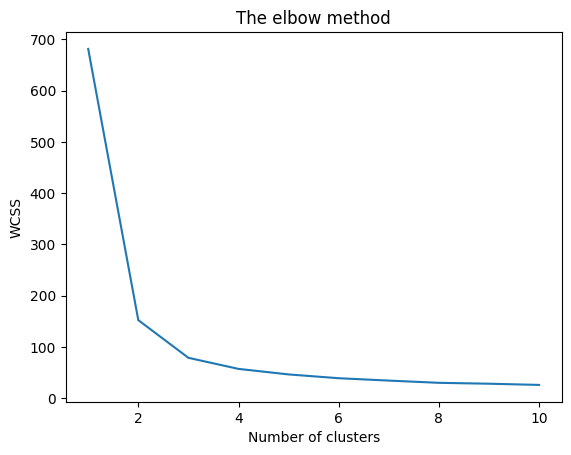

In [7]:
###Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

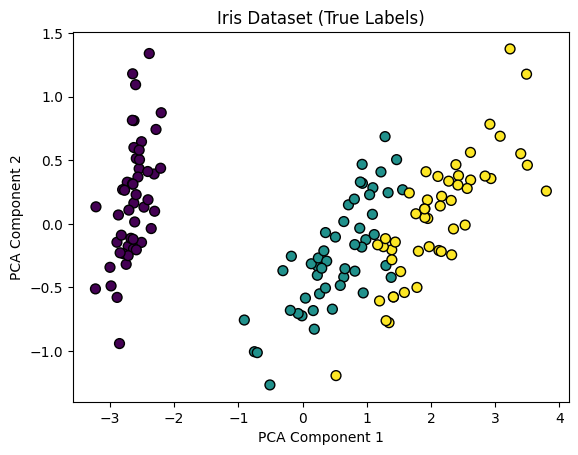

In [3]:
### Visualizing the data to understand its distribution and structure.
# 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iris.data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Iris Dataset (True Labels)')
plt.show()


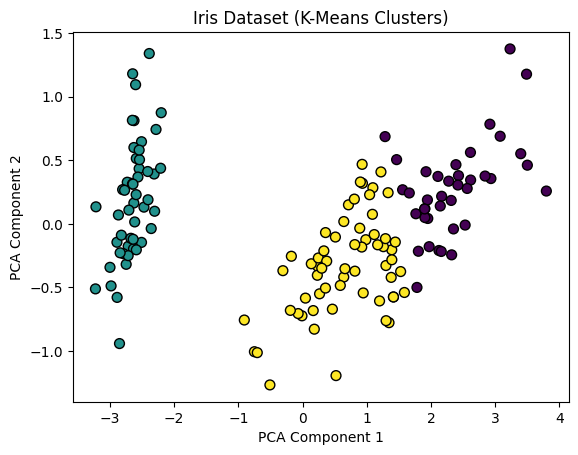

In [8]:
### Visualizing the Cluseters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Iris Dataset (K-Means Clusters)')
plt.show()

In [10]:
### Confustion Matrix

accuracy = np.sum(iris.target == labels) / len(iris.target)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(iris.target, labels)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.09333333333333334
Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
